# Load and Read the CSV files

Module 5.2.3

In [870]:
# import the Pandas and Matplotlib libraries with the Pyplot module.

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [871]:
# declare variables that connect to the CSV files in the Resources folder

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [872]:
# Read the city data file and store it in a pandas DataFrame.

city_data_df = pd.read_csv(city_data_to_load )
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [873]:
# Read the ride data file and store it in a pandas DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Explore the Data in Pandas
Module 5.2.4

## Inspect the City Data DataFrame

For the city_data_df DataFrame, we need to:

• Get all the rows that contain null values.

• Make sure the driver_count column has an integer data type.

• Find out how many data points there are for each type of city.


In [874]:
# Get the columns and the rows that are not null.
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [875]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [876]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [877]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [878]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [879]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [880]:
# Get the number of data points from the rural cities.
sum(city_data_df["type"]=="Rural")

18

## Inspect Ride Data DataFrame

For the ride_data_df DataFrame, we need to:

•Get all the rows that contain null values.

•Make sure the fare and ride_id columns are numerical data types.

In [881]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [882]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [883]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [884]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df,  how="left", on=["city", "city"])

pyber_data_df.head()




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Create DataFrames for Each Type of City
Module 5.3.1

For the bubble chart, we will need to plot the following:

• The average fare for each type of city on the y-axis

• The total number of rides for each type of city on the x-axis

• Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city

In [885]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [886]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Get the Number of Rides for Each City Type

Module 5.3.2

In [887]:
# Get the number of rides for urban cities.

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [888]:
# Create the suburban and rural ride count.

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Get the Average Fare for Each City Type

Module 5.3.3

In [889]:
# Get average fare for each city in the urban cities.

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [890]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


# Get the Average Number of Drivers for Each City Type

Module 5.3.4

In [891]:
# Get the average number of drivers for each urban city.

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [892]:
# Get the average number of drivers for each city for the suburban and rural cities.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]



# Create Bubble Charts

Module 5.3.5

## Create the Urban Cities Bubble Chart

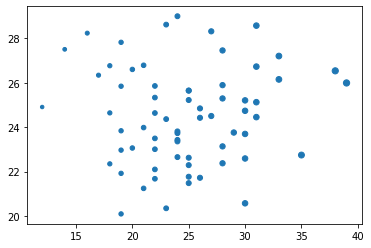

In [893]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s= urban_ride_count)
        





Some of the bubbles are still too small, so let's increase the size by a factor of 10 and add a black edge color to the circles that have a line width of 1. While we're changing these features, let's pay homage to the company's color scheme and make the urban markers coral and 20% transparent. We can also add a title, labels for the axes, a legend, and a grid.

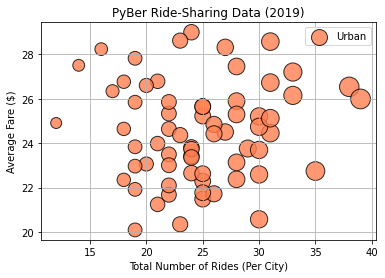

In [894]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10*urban_ride_count,
            color = "coral",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add legend

plt.legend()


## Create the Suburban Cities Bubble Chart

The chart in the output cell will have sky-blue markers that vary in diameter based on the average number of drivers in each city, a title, and axes labels.

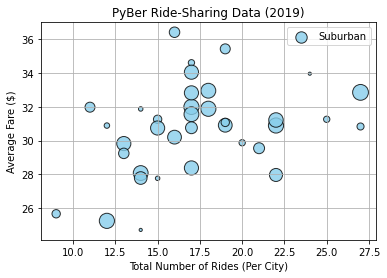

In [895]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10*suburban_driver_count,
            color = "skyblue",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add legend

plt.legend()


## Create the Rural Cities Bubble Chart

Repurposing the code from the suburban cities bubble chart, we'll change the x- and y-axes variables and the size parameter to the rural city data, and we will change the color of the circle to gold.

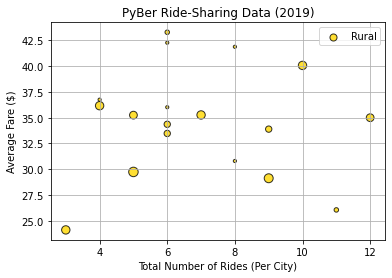

In [896]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10*rural_driver_count,
            color = "gold",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add legend

plt.legend()




# Create a Bubble Chart for All Cities

Module 5.3.6

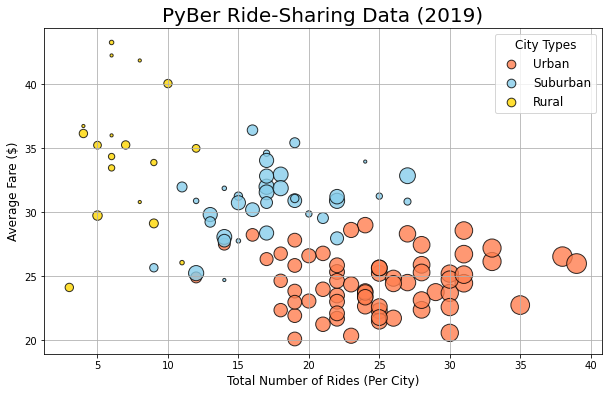

In [897]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10*urban_ride_count,
            color = "coral",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Urban")


plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10*suburban_driver_count,
            color = "skyblue",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Suburban")


plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10*rural_driver_count,
            color = "gold",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Add legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Show the plot
plt.show()

Let's break down what the code above is doing for the legend:

We made the font size for the text "small" with fontsize=.
Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional.
We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by increasing the number.
The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
We added a legend title.
We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list indexing in the brackets to reference one of the three scatter plots. 
Finally, we increased the font size of the legend title to 12.



Fo the code below:
Next, we need to add a note to the right of the chart to let the viewer know that the circle size correlates with the driver count for each city. Our note will say: "Note: Circle size correlates with driver count per city." To do this, we'll use the plt.text() function and add the text. Inside the function, we add the x and y coordinates for the chart and the text in quotes.

The x and y coordinates are based on the chart coordinates. We can see that our chart has a width (i.e., x, between 0 and 42; and y, between 18 and 50). Our x position can be 42, and the y position can be in the middle, 32–35.

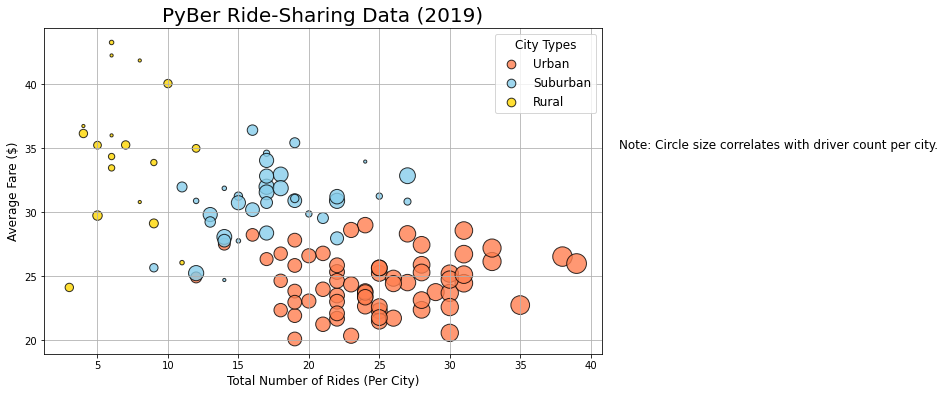

In [898]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s = 10*urban_ride_count,
            color = "coral",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Urban")


plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s = 10*suburban_driver_count,
            color = "skyblue",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Suburban")


plt.scatter(rural_ride_count,
            rural_avg_fare,
            s = 10*rural_driver_count,
            color = "gold",
            edgecolor = "black",
            linewidths = 1, 
            alpha = 0.8,
            label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Add legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

# Summary Statistics for Number of Rides by City Type

Module 5.4.1

We'll use and compare the following three ways to calculate the summary statistics:

The Pandas describe() function on the DataFrame or Series.
The Pandas mean(), median(), and mode() methods on a Series.
The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

## Pandas describe() Function

The describe() function is a convenient tool to get a high-level summary statistics on a DataFrame or Series. After running the function, the output will show the count, mean, standard deviation, minimum value, 25%, 50%, and 75% percentiles, and maximum value from a DataFrame column that has numeric values.

In [899]:
# Get summary statistics for urban_cities_dataframe.
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [900]:
# Get summary statistics for suburban dataframe.

suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [901]:
# Get summary statistics for rural dataframe.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [902]:
# Get summary statistics for urban cities ride count.

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [903]:
# Get summary statistics for suburban cities ride count.

suburban_ride_count.describe()


count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [904]:
# Get summary statistics for rural cities ride count.

rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Pandas mean(), median(), and mode() Methods

If we want to get only the mean without getting the complete summary statistics, we can use the mean() method.

In [905]:
# Calculate the mean of the ride count for each city type.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [906]:
# Calculate the median of the ride count for each city type.

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [907]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [908]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [909]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
dtype: int64

## NumPy mean() and median() Functions and SciPy mode() Function

An optional approach to calculating the mean, median, and mode of a DataFrame or Series is to use the NumPy and SciPy statistics modules. We introduce these methods because there might come a time when you're working in the Python interpreter or VS Code environment instead of the Jupyter Notebook environment.

Whether you are using the use the Python interpreter, VS Code, or Jupyter Notebook environment, we will need to import the NumPy and SciPy statistics modules. Add the following import statements to a new cell in your PyBer.ipynb file and run the cell.

In [910]:
# Import NumPy and the stats module from SciPy.

import numpy as np
import scipy.stats as sts


Let's calculate the mean, median, and mode—otherwise known as the measures of central tendency for the ride counts—and print out those measures.


Unlike the Pandas mode() method, the sts.mode() method will return the number of times the mode appears in the dataset.

In [911]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")


median_urban_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_count}.")


mode_urban_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_count}.")



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [912]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_count}.")


mode_suburban_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_count}.")



The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [913]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_count}.")


mode_rural_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_count}.")



The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


# Summary Statistics for the Fare by City Type

Module 5.4.2

In [914]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [915]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [916]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [917]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [918]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [919]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


# Summary Statistics for the Number of Drivers by City Type

Module 5.4.3


In [920]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [921]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is ${mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median driver count for urban trips is ${median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is ${mode_urban_driver_count}.")



The mean driver count for urban trips is $36.68.
The median driver count for urban trips is $37.0.
The mode driver count for urban trips is $ModeResult(mode=array([39]), count=array([86])).


In [922]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [923]:
# Calculate the measures of central tendency for the driver count for the suburban cities.
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is ${mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is ${median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is ${mode_suburban_driver_count}.")


The mean driver count for suburban trips is $13.71.
The median driver count for suburban trips is $16.0.
The mode driver count for suburban trips is $ModeResult(mode=array([20]), count=array([79])).


In [924]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [925]:
# Calculate the measures of central tendency for the driver count for the rural cities.
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is ${mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median driver count for rural trips is ${median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is ${mode_rural_driver_count}.")


The mean driver count for rural trips is $4.30.
The median driver count for rural trips is $4.0.
The mode driver count for rural trips is $ModeResult(mode=array([1]), count=array([32])).


# Create Box-and-Whisker Plots

Module 5.4.4

## Box-and-Whisker Plots for Ride Count Data


First, we create the x-axis labels with a list, x_labels = ["Urban"].

Next, the data and labels are passed in the boxplot function.

Finally, we set the y_ticks with a range from 10 to 41 with ticks at an increment of 2. This will help determine where the minimum and maximum lie as well as any outliers.

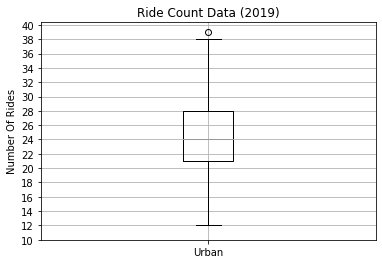

In [926]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add a title, y-axis and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number Of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()



Looking at this box-and-whisker plot, we can see:

There is at least one outlier, which is close to 40. This our maximum data point, 39.
The minimum is 12.
The median is 24 or the 50th percentile.
The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.

In [927]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

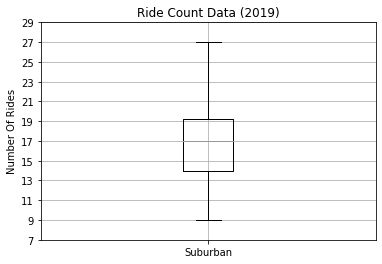

In [928]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add a title, y-axis and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number Of Rides")
ax.set_yticks(np.arange(7, 30, step=2.0))
ax.grid()
plt.show()



In [929]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

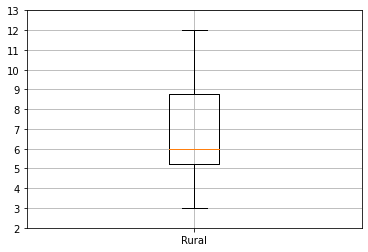

In [930]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# Add a title, y_axis and grid.
ax.set_title = ("Ride Count Data (2019)")
ax.set_ylabel = ("Number of Rides")
ax.set_yticks(np.arange(2, 14, step=1.0))
ax.grid()
plt.show()


In [931]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

## Combining all the city type box-and-whisker plots on one chart

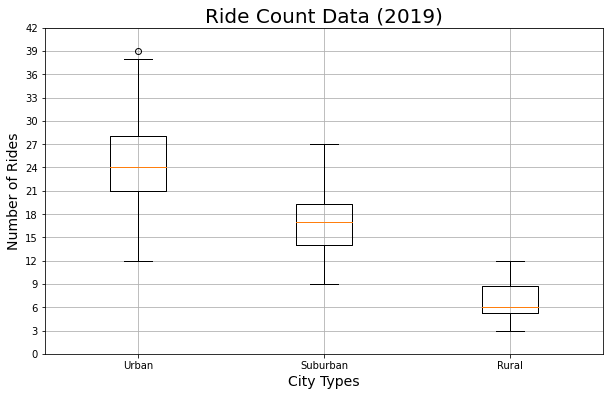

In [932]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

Findings on the above chart:

There is one outlier in the urban ride count data. Also, the average number of rides in the rural cities is about 4- and 3.5-times lower per city than the urban and suburban cities, respectively.

In [933]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box-and-Whisker Plots for Ride Fare Data

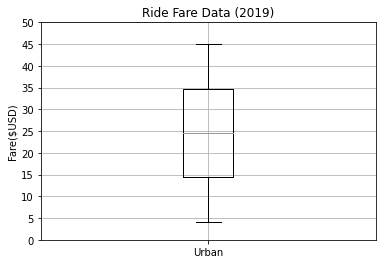

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [934]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

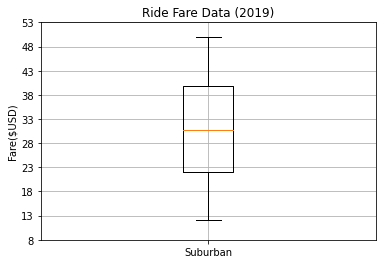

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [935]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(8, 56, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

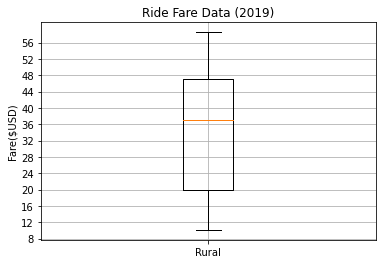

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [936]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(8, 60, step=4.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

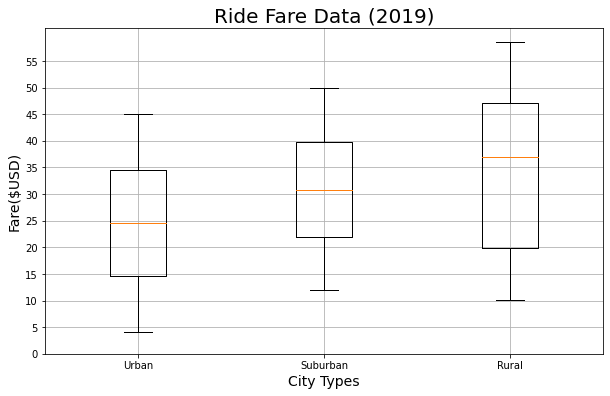

In [937]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fares = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fares, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

## Box-and-Whisker Plots for Driver Count Data

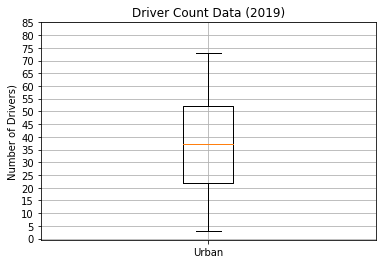

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [938]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

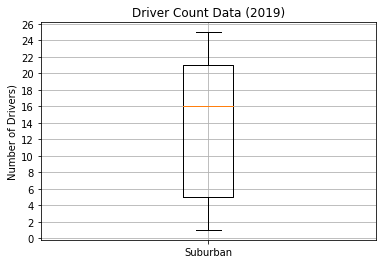

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [939]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 27, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

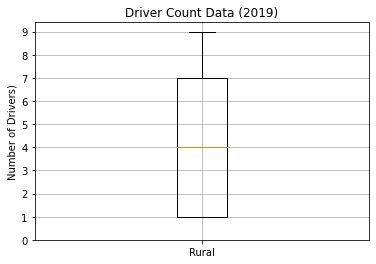

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [940]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 10, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

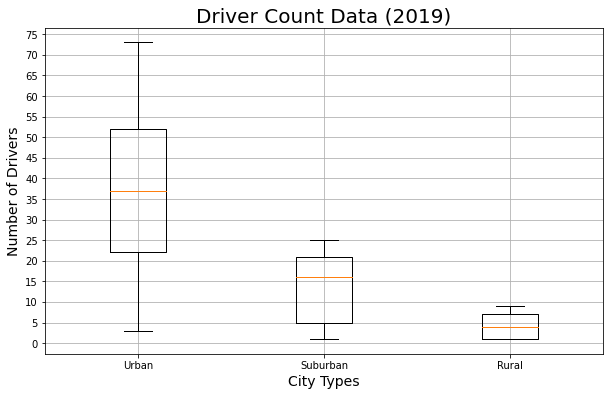

In [941]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

# Get the Percentage of Fares for Each City Type

Module 5.5.1 


Get the total fares for each city type.

Get the total for all the fares for all the city types.

Calculate the percentage of the total fares for each city type.

To get the total fares for city type, we need to create a Series where the index is the type of city on the pyber_data_df DataFrame and the column is the sum of the fares for city type.

In [942]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [943]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [944]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [945]:
# Another way to show the same results but in one line.
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

# Pie Chart for the Percentage of Fares by City Type

Module 5.5.2


For the pie chart, each pie wedge will represent a city and its percentage of the total fares. The labels will be the city type.

We can use type_percents for the values for each pie wedge and create an array for the labels.

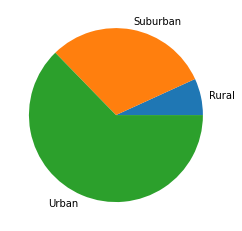

In [946]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

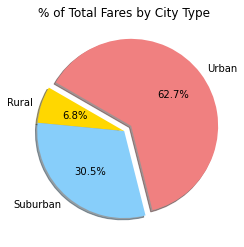

In [947]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

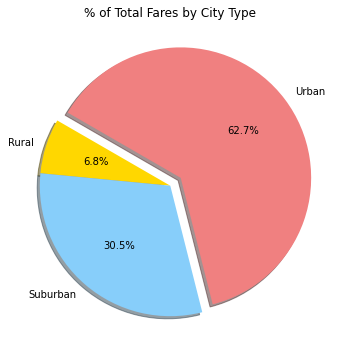

In [948]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

# Calculate Ride Percentages 

Module 5.6.1

Get the total number of rides for each city type.

Get the total rides for all the city types.

Calculate the percentage of the total rides for each city type.

To get the total rides for each type of city, we need to create a Series of data where the index is the type of city, and the column for the Series is the number of the rides for the type of city. This is similar to how we created the Series for the percentage of fares for each city type.

To calculate the percentage of rides for each city type based on all the rides, we will:

Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column:

pyber_data_df.groupby(["type"])
Apply the count() function on the ride_id column to get the Series with the total number of rides for each city type:

pyber_data_df.groupby(["type"]).count()["ride_id"]

Get the number of total rides using the count() function on the ride_id column on the pyber_data_df DataFrame:

pyber_data_df["ride_id"].count()
Divide the total number of rides for each city type by the total rides for all the cities and divide by 100.

In [949]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents 

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

# Pie Chart for Percentage of Rides by City Type

Module 5.6.2

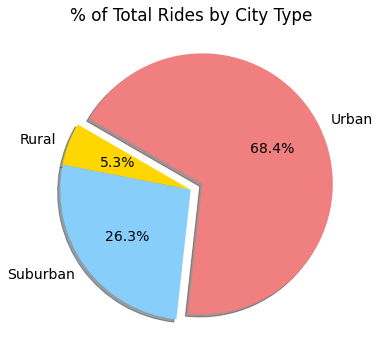

In [950]:
# Build Pie Chart for percentage of rides by city type.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

# Calculate Driver Percentages

Module 5.7.1

In [954]:
# Calculate the percentage of drivers for each city type.

driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

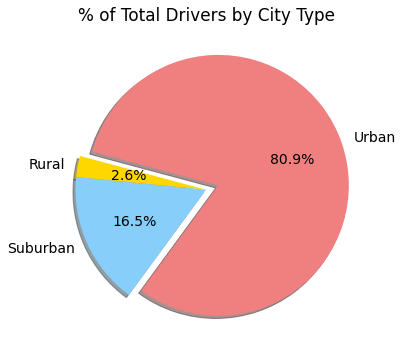

In [955]:
# Build Pie Chart for the driver percentage.

plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()